In [8]:
from pathlib import Path
import open3d as o3d
from src import kitti, stereo, lea_stereo
import numpy as np
import copy

import matplotlib.pyplot as plt

In [9]:
dataset = kitti.KittiDataset(Path('dataset/sequences/00'))

In [10]:
test_frame = kitti.KittiFrame(dataset, 654)
ster = lea_stereo.LEAStereo(dataset.calib)

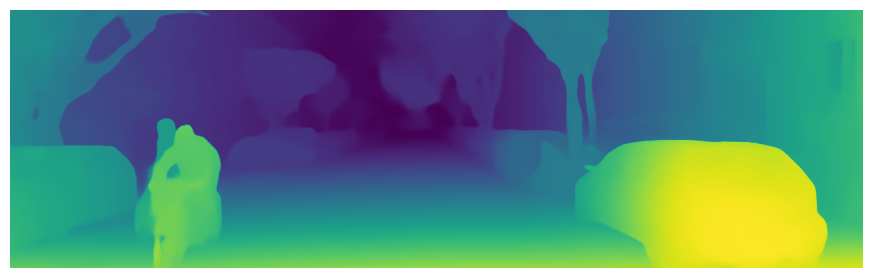

In [11]:
disp = ster.disparity(test_frame)
plt.figure(figsize=(11,7))
plt.axis('off')
plt.imshow(disp)

In [12]:
depth = ster.depth(disp)

In [13]:
def gen_point_cloud(index):
    frame = kitti.KittiFrame(dataset, index)
    disp = ster.disparity(frame)
    depth = ster.depth(disp)
    return ster.point_cloud(frame, depth)

In [14]:
def draw_registration_result(source, target, transformation):
    #source.paint_uniform_color([1, 0.706, 0])
    target.paint_uniform_color([0, 0.651, 0.929])
    source.transform(transformation)
    o3d.visualization.draw_geometries([source, target])

In [15]:
pt1 = gen_point_cloud(645)
pt2 = gen_point_cloud(646)

pt2.estimate_normals()
reg_p2p = o3d.pipelines.registration.registration_icp(
    pt1, pt2, 0.0002, np.identity(4),
    o3d.pipelines.registration.TransformationEstimationPointToPlane())

print(reg_p2p.transformation)
# draw_registration_result(pt1, pt2, reg_p2p.transformation)
pt1.transform(reg_p2p.transformation)

full_cloud = (pt1 + pt2).voxel_down_sample(0.00002)
o3d.visualization.draw_geometries([full_cloud])


[[ 9.99997106e-01  1.87144745e-03  1.51152034e-03  3.73013569e-05]
 [-1.87754842e-03  9.99990056e-01  4.04503465e-03  1.20494009e-04]
 [-1.50393524e-03 -4.04786090e-03  9.99990676e-01  1.08778904e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [16]:
pcd = o3d.io.read_point_cloud("full.pcd")
pt1 = gen_point_cloud(600)
o3d.visualization.draw_geometries([pt1])

In [17]:
down = pcd.voxel_down_sample(0.0002)
o3d.visualization.draw_geometries([down])